In [117]:
#import libraries and set up display
import numpy as np
import pandas as pd
from IPython.display import display # display dataframe as a table
% matplotlib notebook # display graphs in notebook
import visuals as vs # import another file for visualization

# load the wholesale customers dataset downloaded from the UCI Machine Learning Repository
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [ ]:
# display a description of the dataset
display(data.describe())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,13265,1196,4221,6404,507,1788
1,1989,10690,19460,233,11577,2153
2,8565,4980,67298,131,38102,1215


Chosen samples offset from mean of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1265.0,-4600.0,-3730.0,3332.0,-2374.0,263.0
1,-10011.0,4894.0,11509.0,-2839.0,8696.0,628.0
2,-3435.0,-816.0,59347.0,-2941.0,35221.0,-310.0


Chosen samples offset from median of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,4761.0,-2431.0,-535.0,4878.0,-309.0,822.0
1,-6515.0,7063.0,14704.0,-1293.0,10761.0,1187.0
2,61.0,1353.0,62542.0,-1395.0,37286.0,249.0


Quartile Visualization


<IPython.core.display.Javascript object>


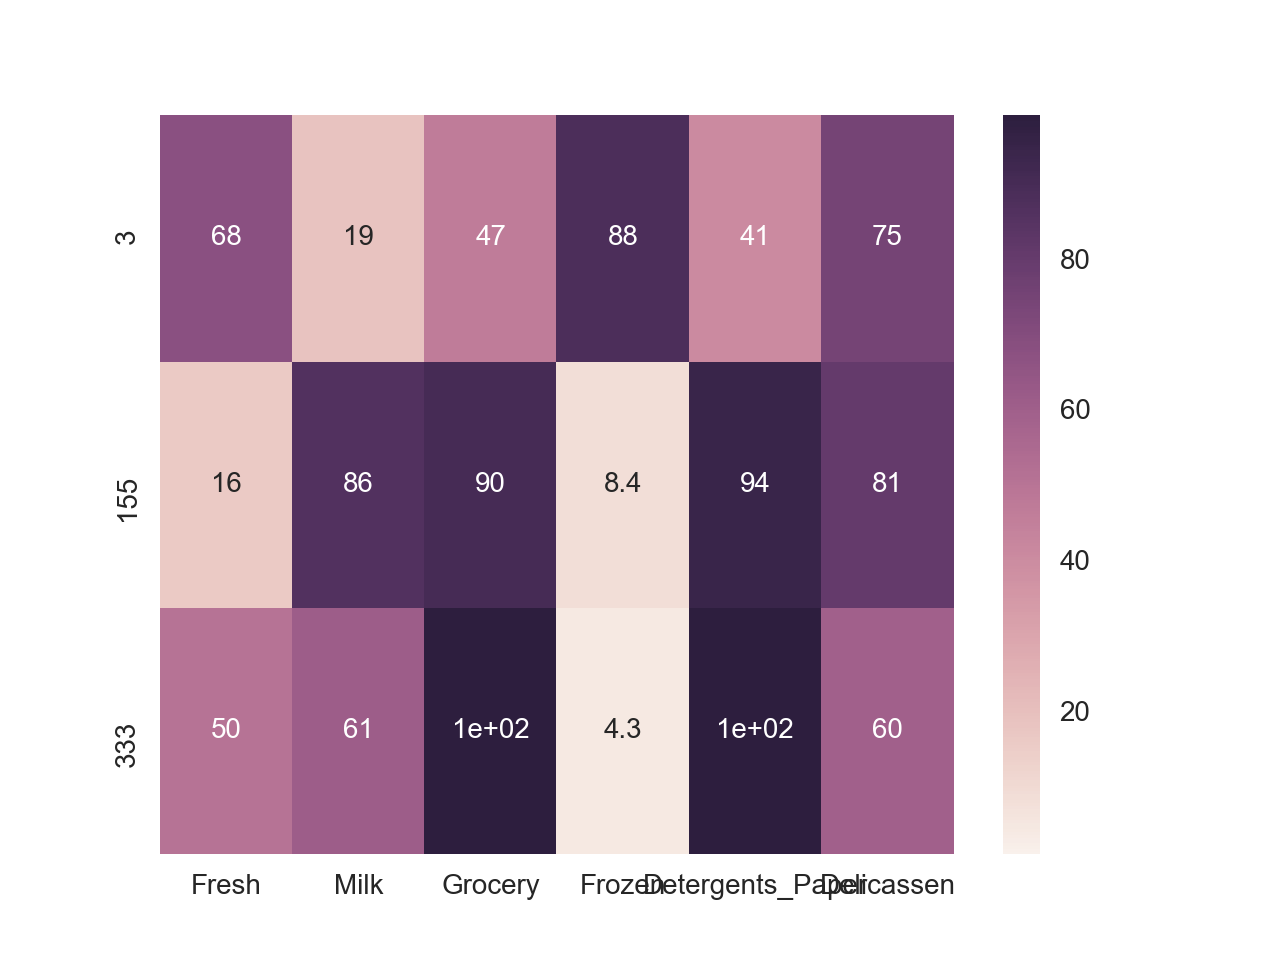

In [101]:
# get a sense of the data: pick three rows to take a look
indices = [3,155,333]

# put the selected samples into a dataframe and display the samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

#display expenditure centered around mean
print ("Chosen samples offset from mean of dataset:")
display(samples - np.around(data.mean().values))

#display expenditure centered around medium
print ("Chosen samples offset from median of dataset:")
display(samples - np.around(data.median().values))

#display a heatmap to visualize quartiles of expenditures in each product category
print ("Quartile Visualization")
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

<IPython.core.display.Javascript object>


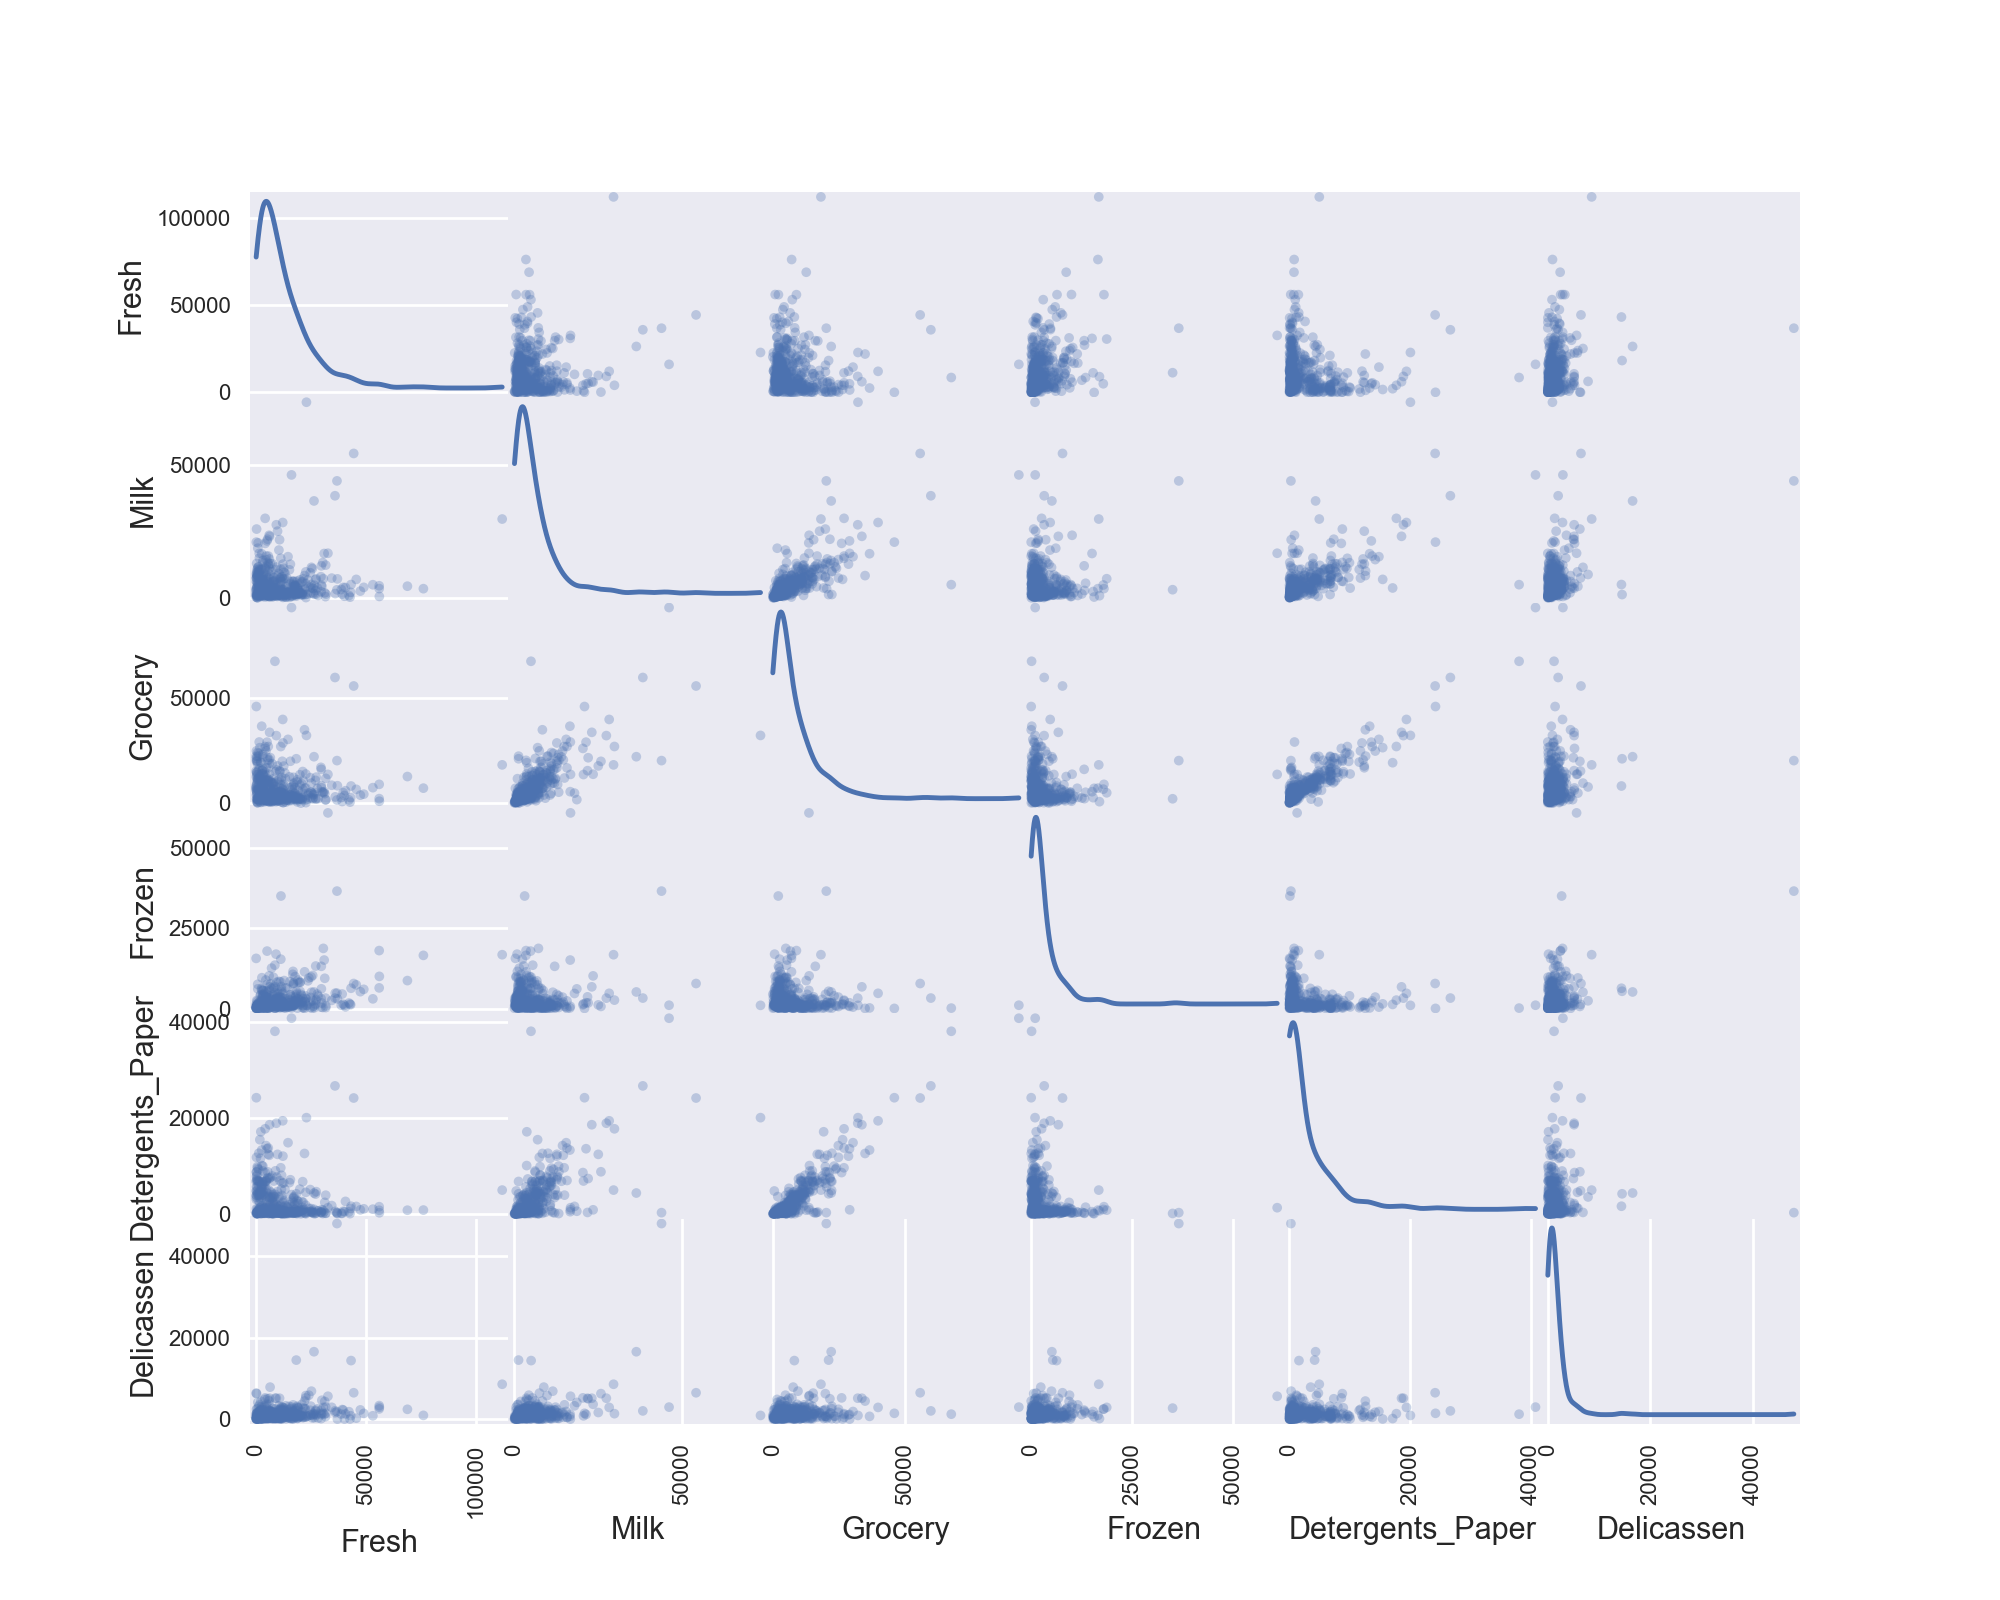

Score of Fresh Is  0.217752343664
Score of Milk Is  0.351673280606
Score of Grocery Is  0.775212999482
Score of Frozen Is  -3.29872946144
Score of Detergents_Paper Is  0.775022714781
Score of Delicassen Is  0.393059374923


In [102]:
'''
feature relevance: understand the relevance of each feature for identifying customers' spending habits
method: use each feature as the target label, and fit a decision tree on a the training data,
and display the R^2 of the predictive model on the test data.
'''

#visualize feature distributions - produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (10,8), diagonal = 'kde');

#use machine learning package sklean to train a decision tree learner and do cross validation
from sklearn.cross_validation import train_test_split
from sklearn import tree

#loop over each product category
for feature in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']:
    # remove the given feature from the data, and make a copy of the DataFrame
    feature_array = data[feature]
    new_data = data.drop([feature],axis = 1)

    # split the data into training and test sets, and use the removed feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, feature_array, test_size = 0.25, random_state = 29)

    # fit a decision tree regressor to the training set
    regressor = tree.DecisionTreeRegressor(random_state=29)
    regressor.fit(X_train, y_train)

    # display the R^2 of the predictive model using the testing set
    score = regressor.score(X_test, y_test)
    print("Score of " + feature + " Is ", score)


<IPython.core.display.Javascript object>


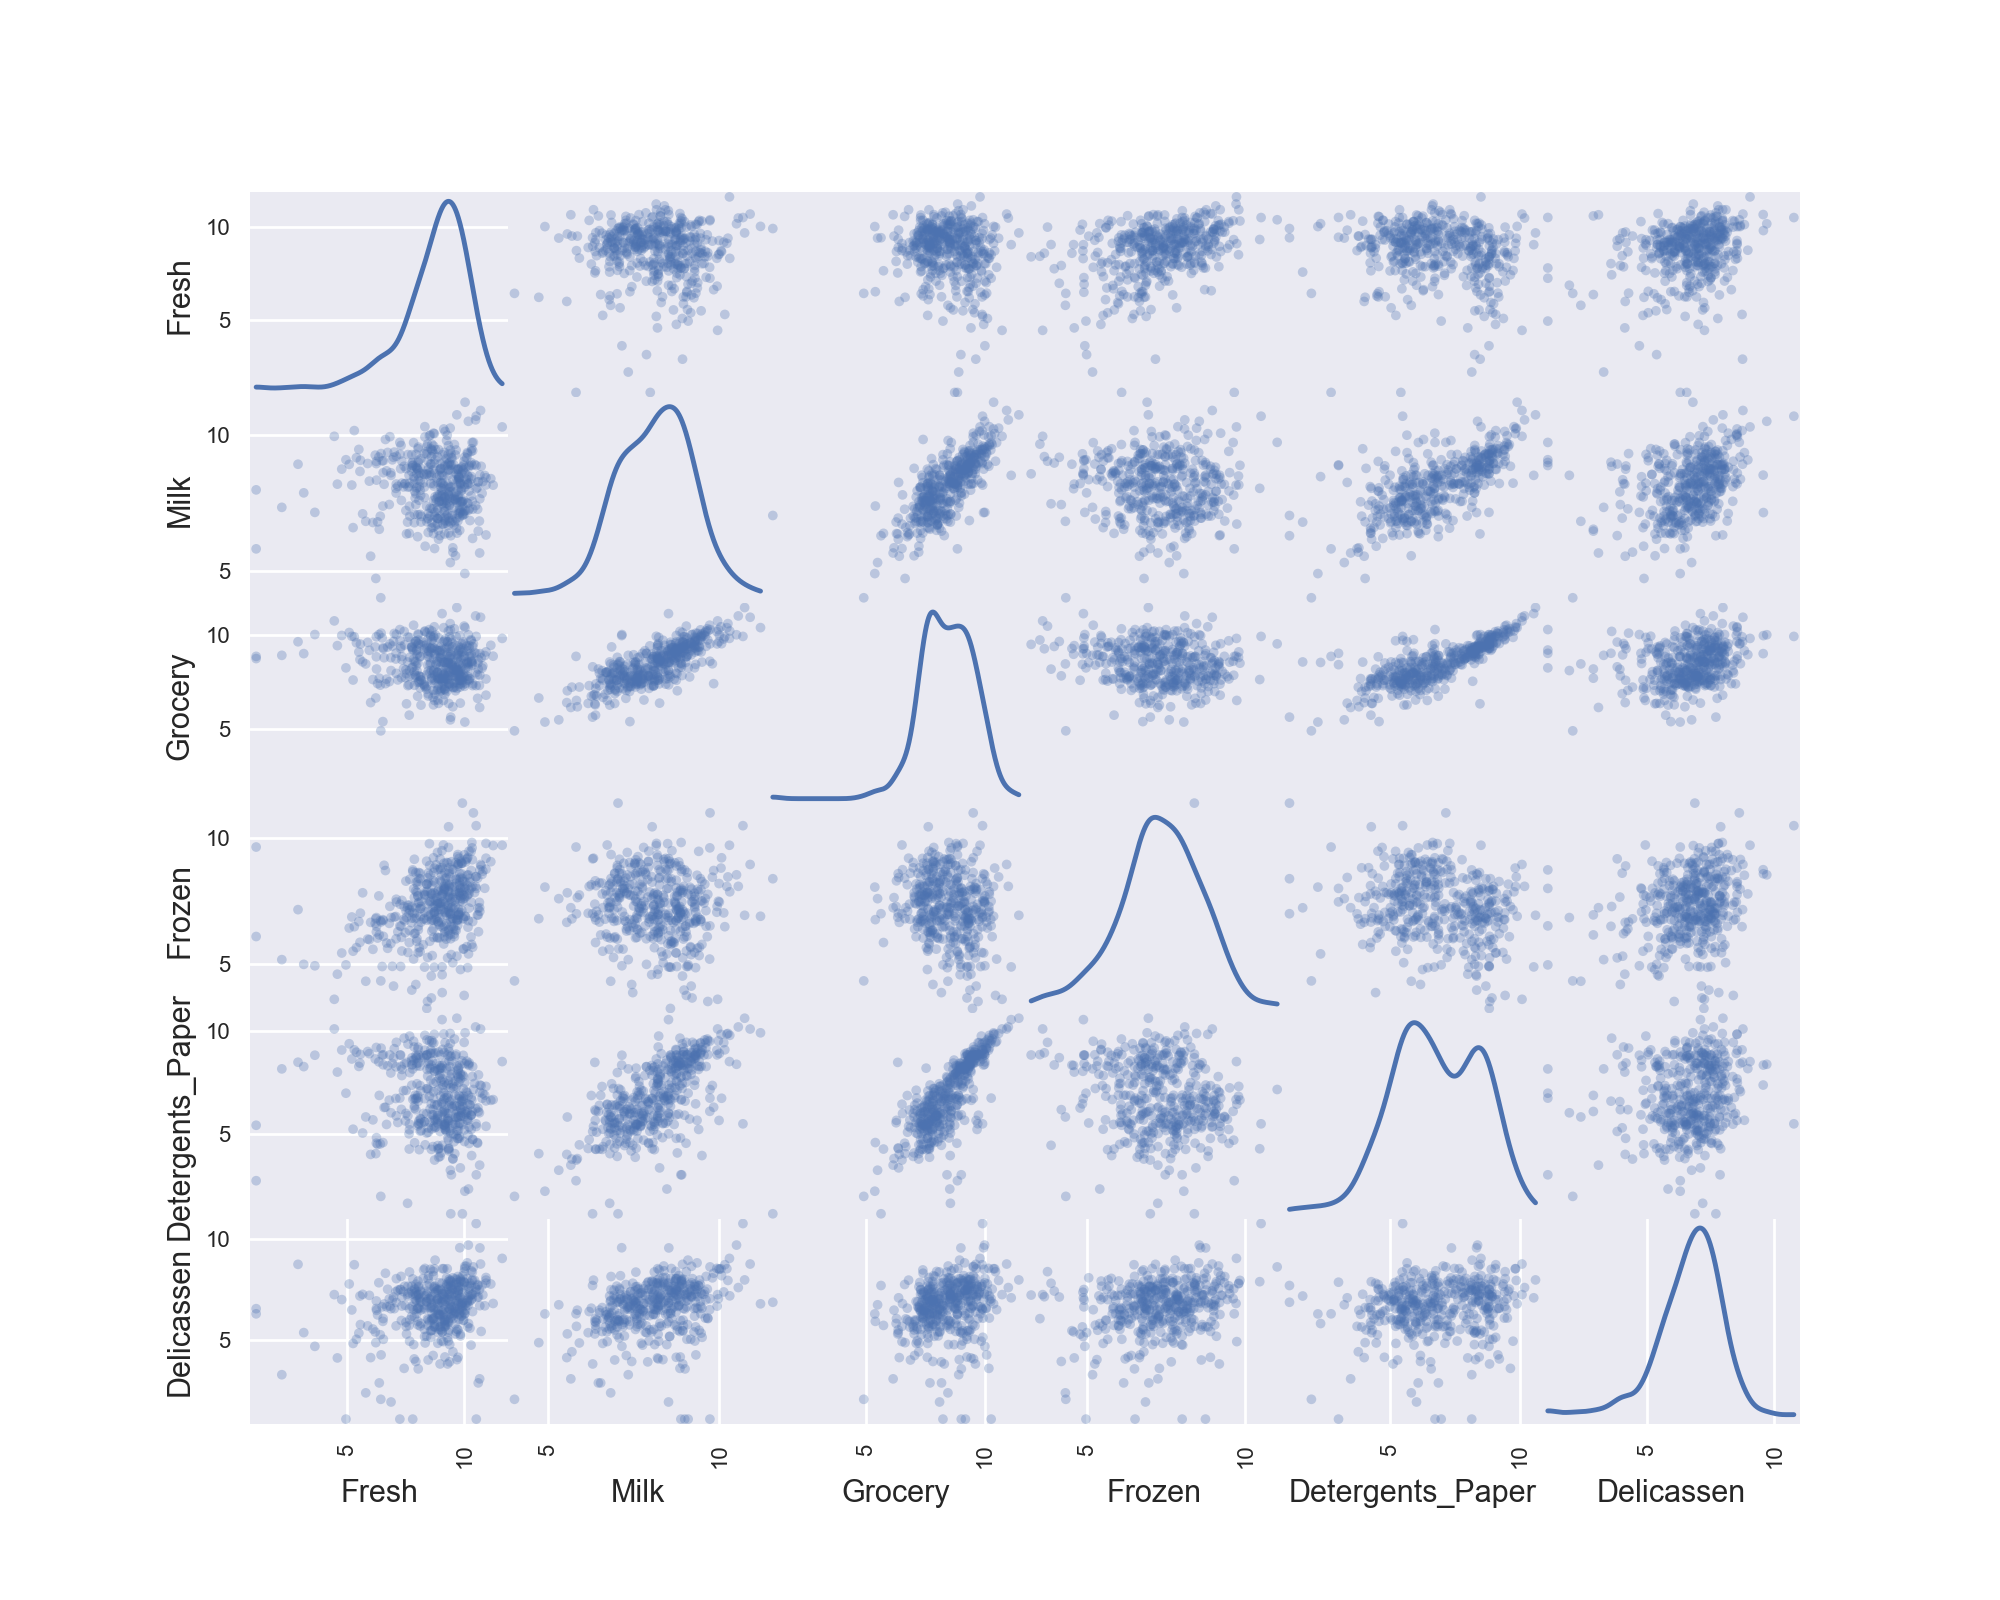

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,7.595387,9.277064,9.876116,5.451038,9.356776,7.674617
2,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


In [103]:
'''
data processing:
since the data has a large positive skew, I'm going to do a log transformation to reduce skewness 
'''

# scale the data using the natural logarithm
log_data = np.log(data)

# scale the selected samples using the natural logarithm
log_samples = np.log(samples)

# produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (10,8), diagonal = 'kde');

# display the log-transformed sample data
display(log_samples)


In [104]:
# outlier detection and removal

all_outliers = np.array([], dtype='int64')

# for each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    
    # display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier_points)

all_outliers, indices = np.unique(all_outliers, return_inverse = True)
counts = np.bincount(indices)
outliers = all_outliers[counts > 1] # find obervations that have at least two outlier values

# display the outlier obeservation indexes
print (outliers)

# remove the outliers, and ensure that the sample data does not contain any of these points
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True) # store the processed data in good_data

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]


<IPython.core.display.Javascript object>


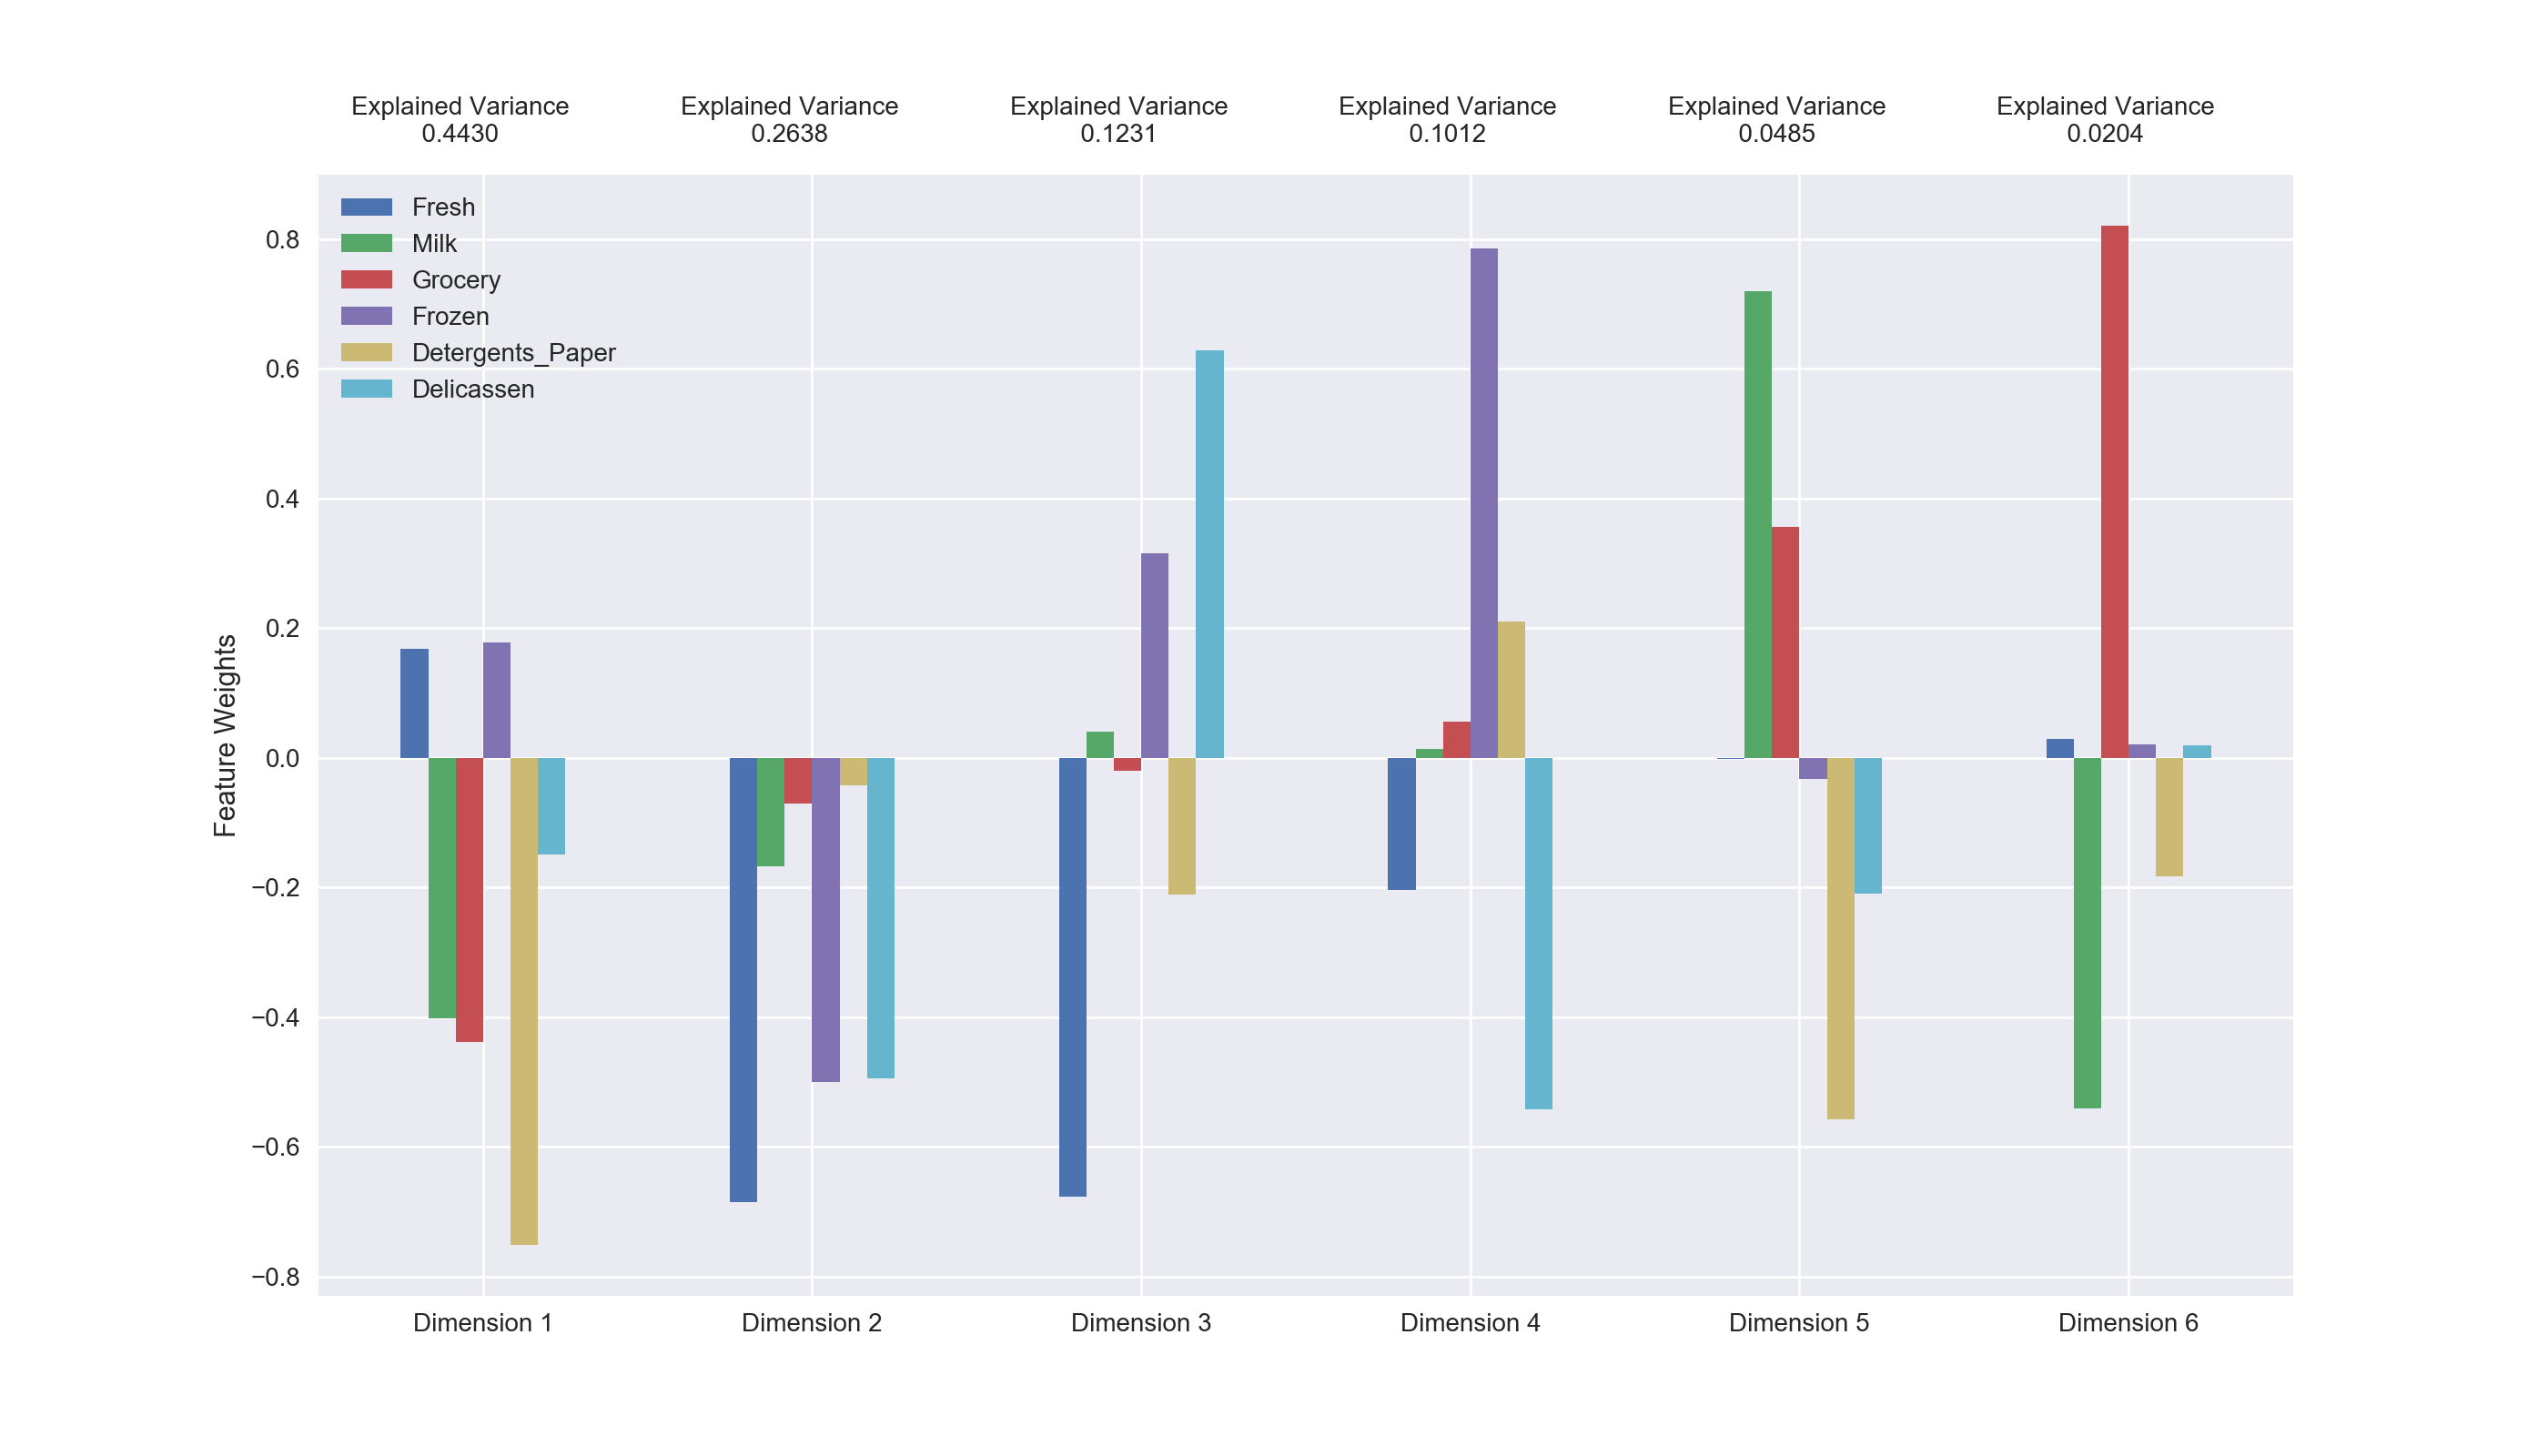

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1553,-1.4052,0.5422,0.4127,-0.6865,0.6409
1,-3.6804,0.8560,0.2964,-1.1343,-0.2383,0.0215
2,-4.5848,0.4149,-1.5408,-1.2655,-0.8767,1.2544


In [105]:
'''
apply PCA to investigate which dimensions best maximize the variance, 
and report how much variance within the data is explained by that dimension alone. 
--note that a component (dimension) from PCA can be considered a new "feature" of the space, 
and it is a composition of the original features present in the data.
'''

from sklearn.decomposition import PCA
# apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# display cumulative variance:
print (pca_results['Explained Variance'].cumsum())

# display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

In [106]:
#dimension reduction - use only the first two dimensions

# fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1553,-1.4052
1,-3.6804,0.8560
2,-4.5848,0.4149


KMeans score 0.426281015469


<IPython.core.display.Javascript object>


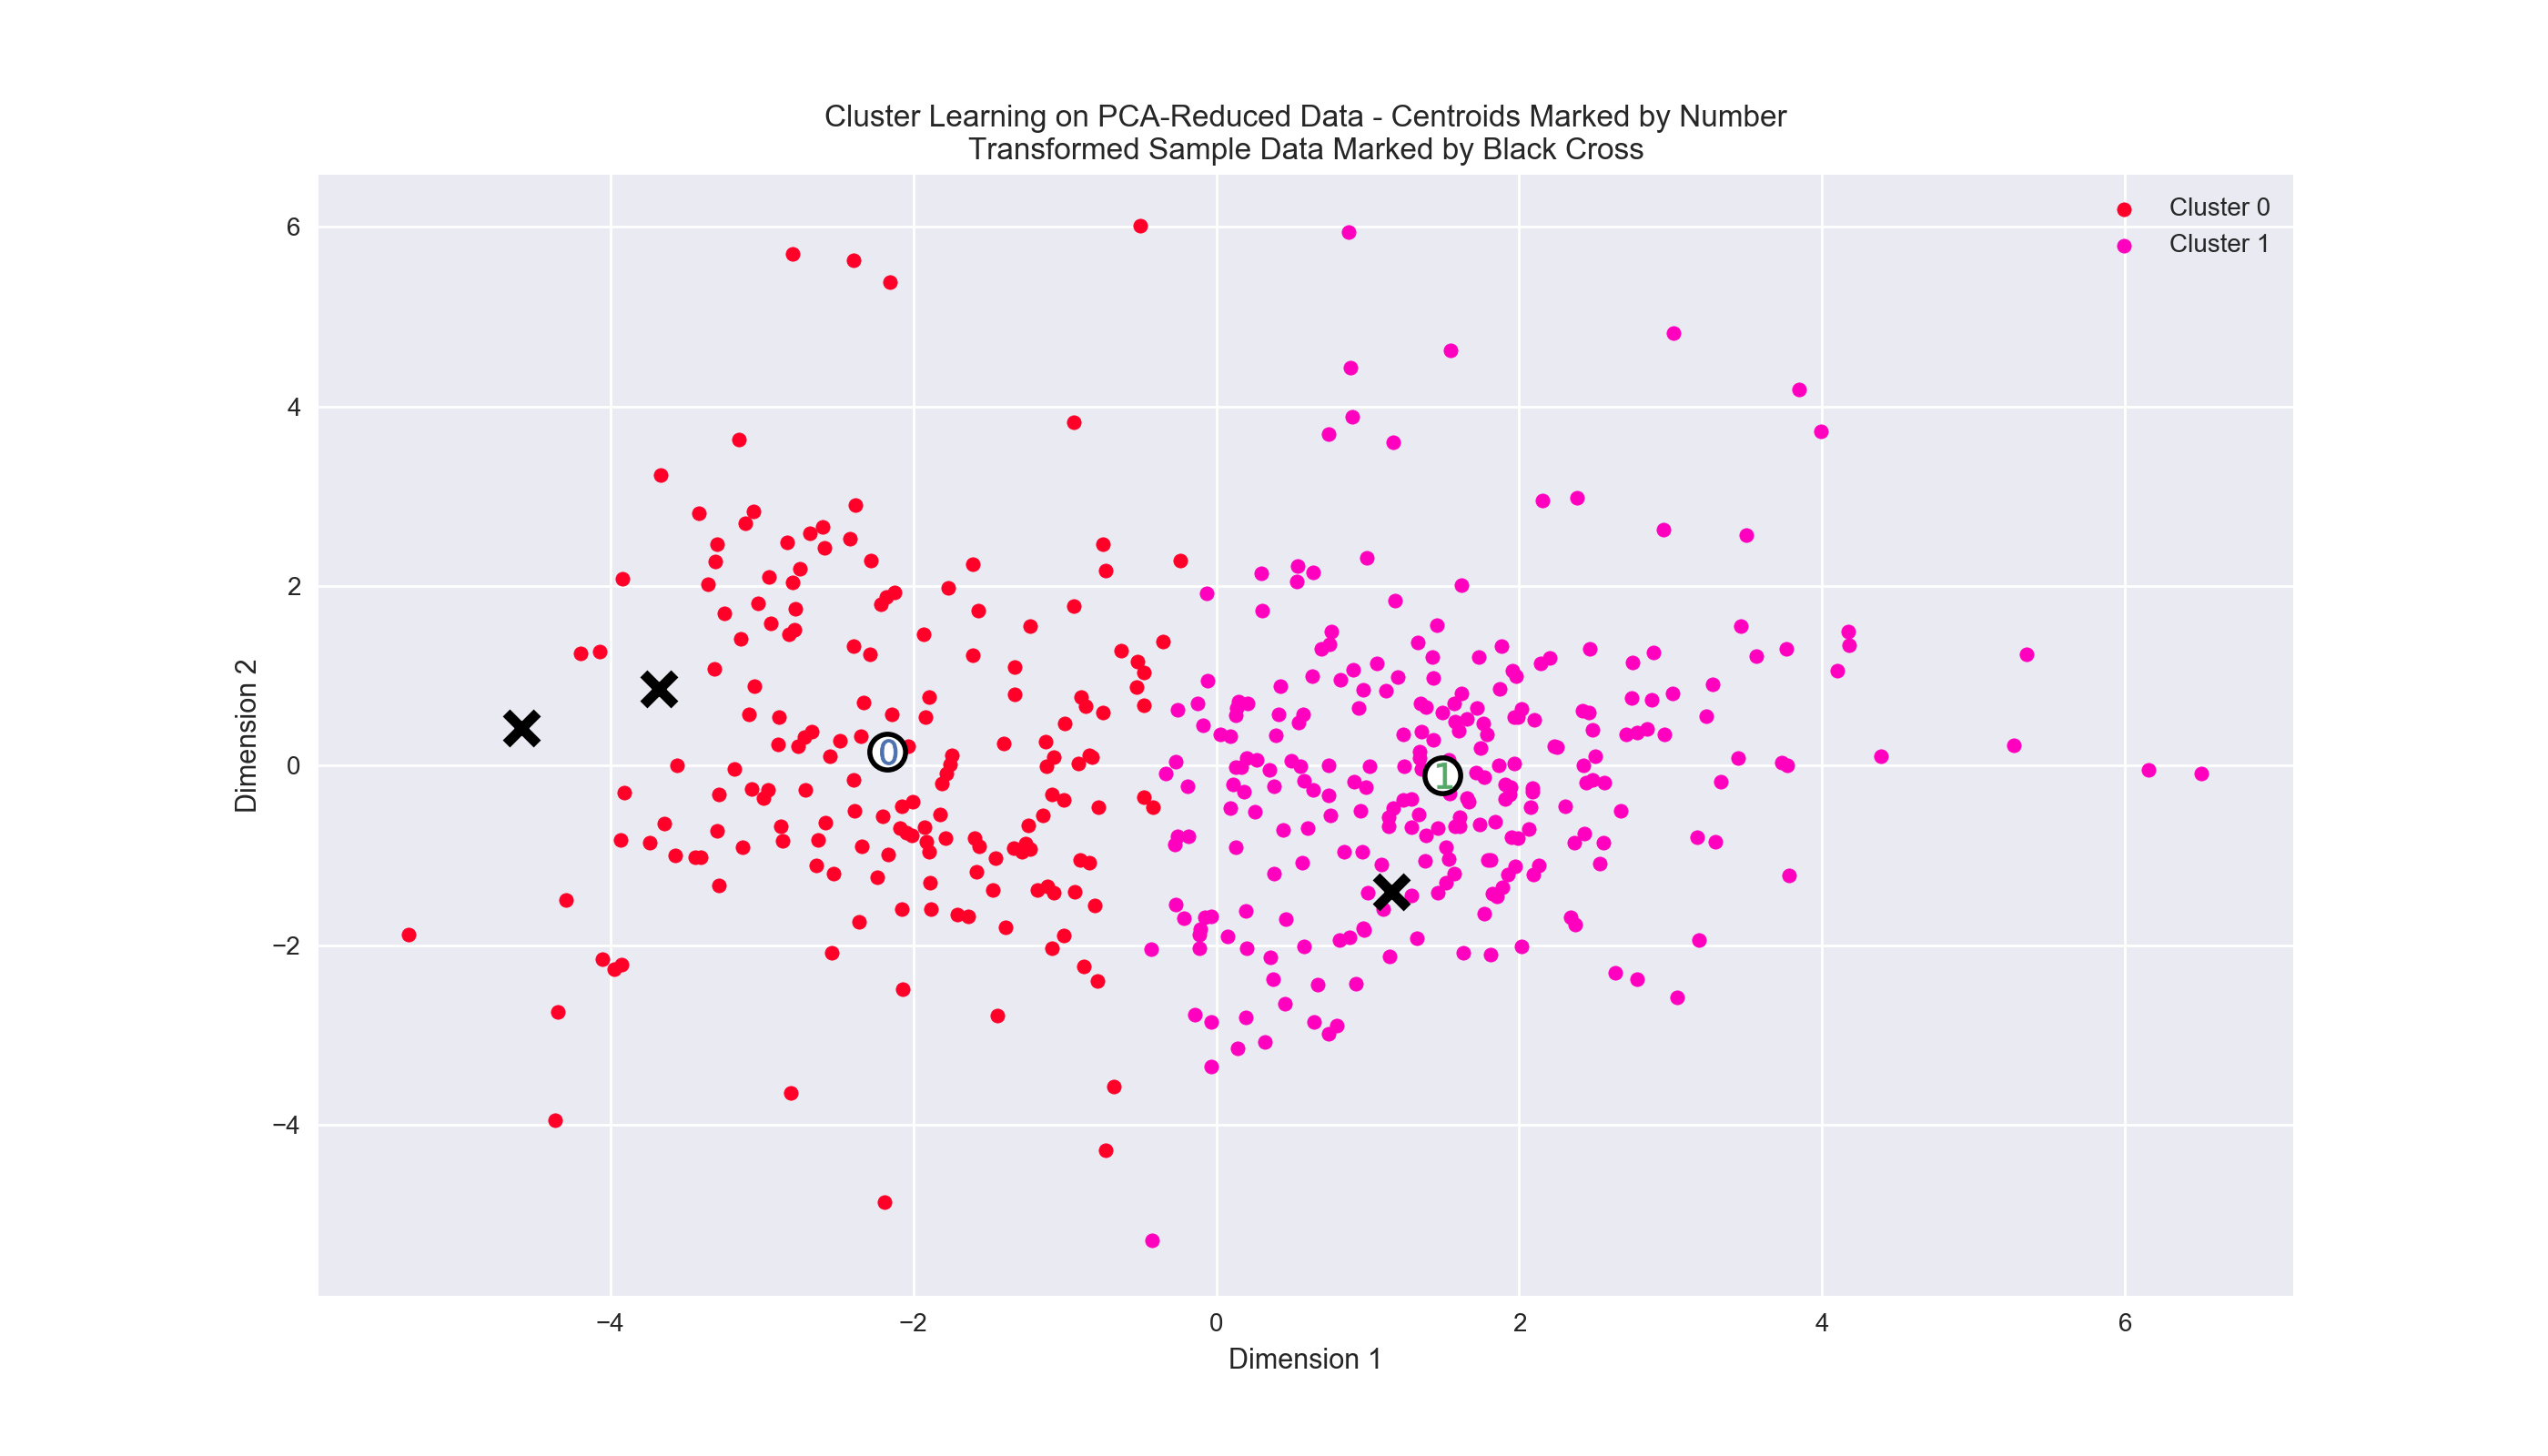

In [107]:
# create clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# apply K-means clustering to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=29).fit(reduced_data)

# pedict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

# predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print("KMeans score", score)

# visualize the clusters
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [108]:
# recover personas of each cluster from dimension reduction and scale transformation

# inverse transform the centers
log_centers = pca.inverse_transform(centers)

# exponentiate the centers
true_centers = np.exp(log_centers)

# display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

print ("Actual cluster centers")
display(true_centers)

# predict which cluster the selected samples belong to
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Actual cluster centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


<IPython.core.display.Javascript object>


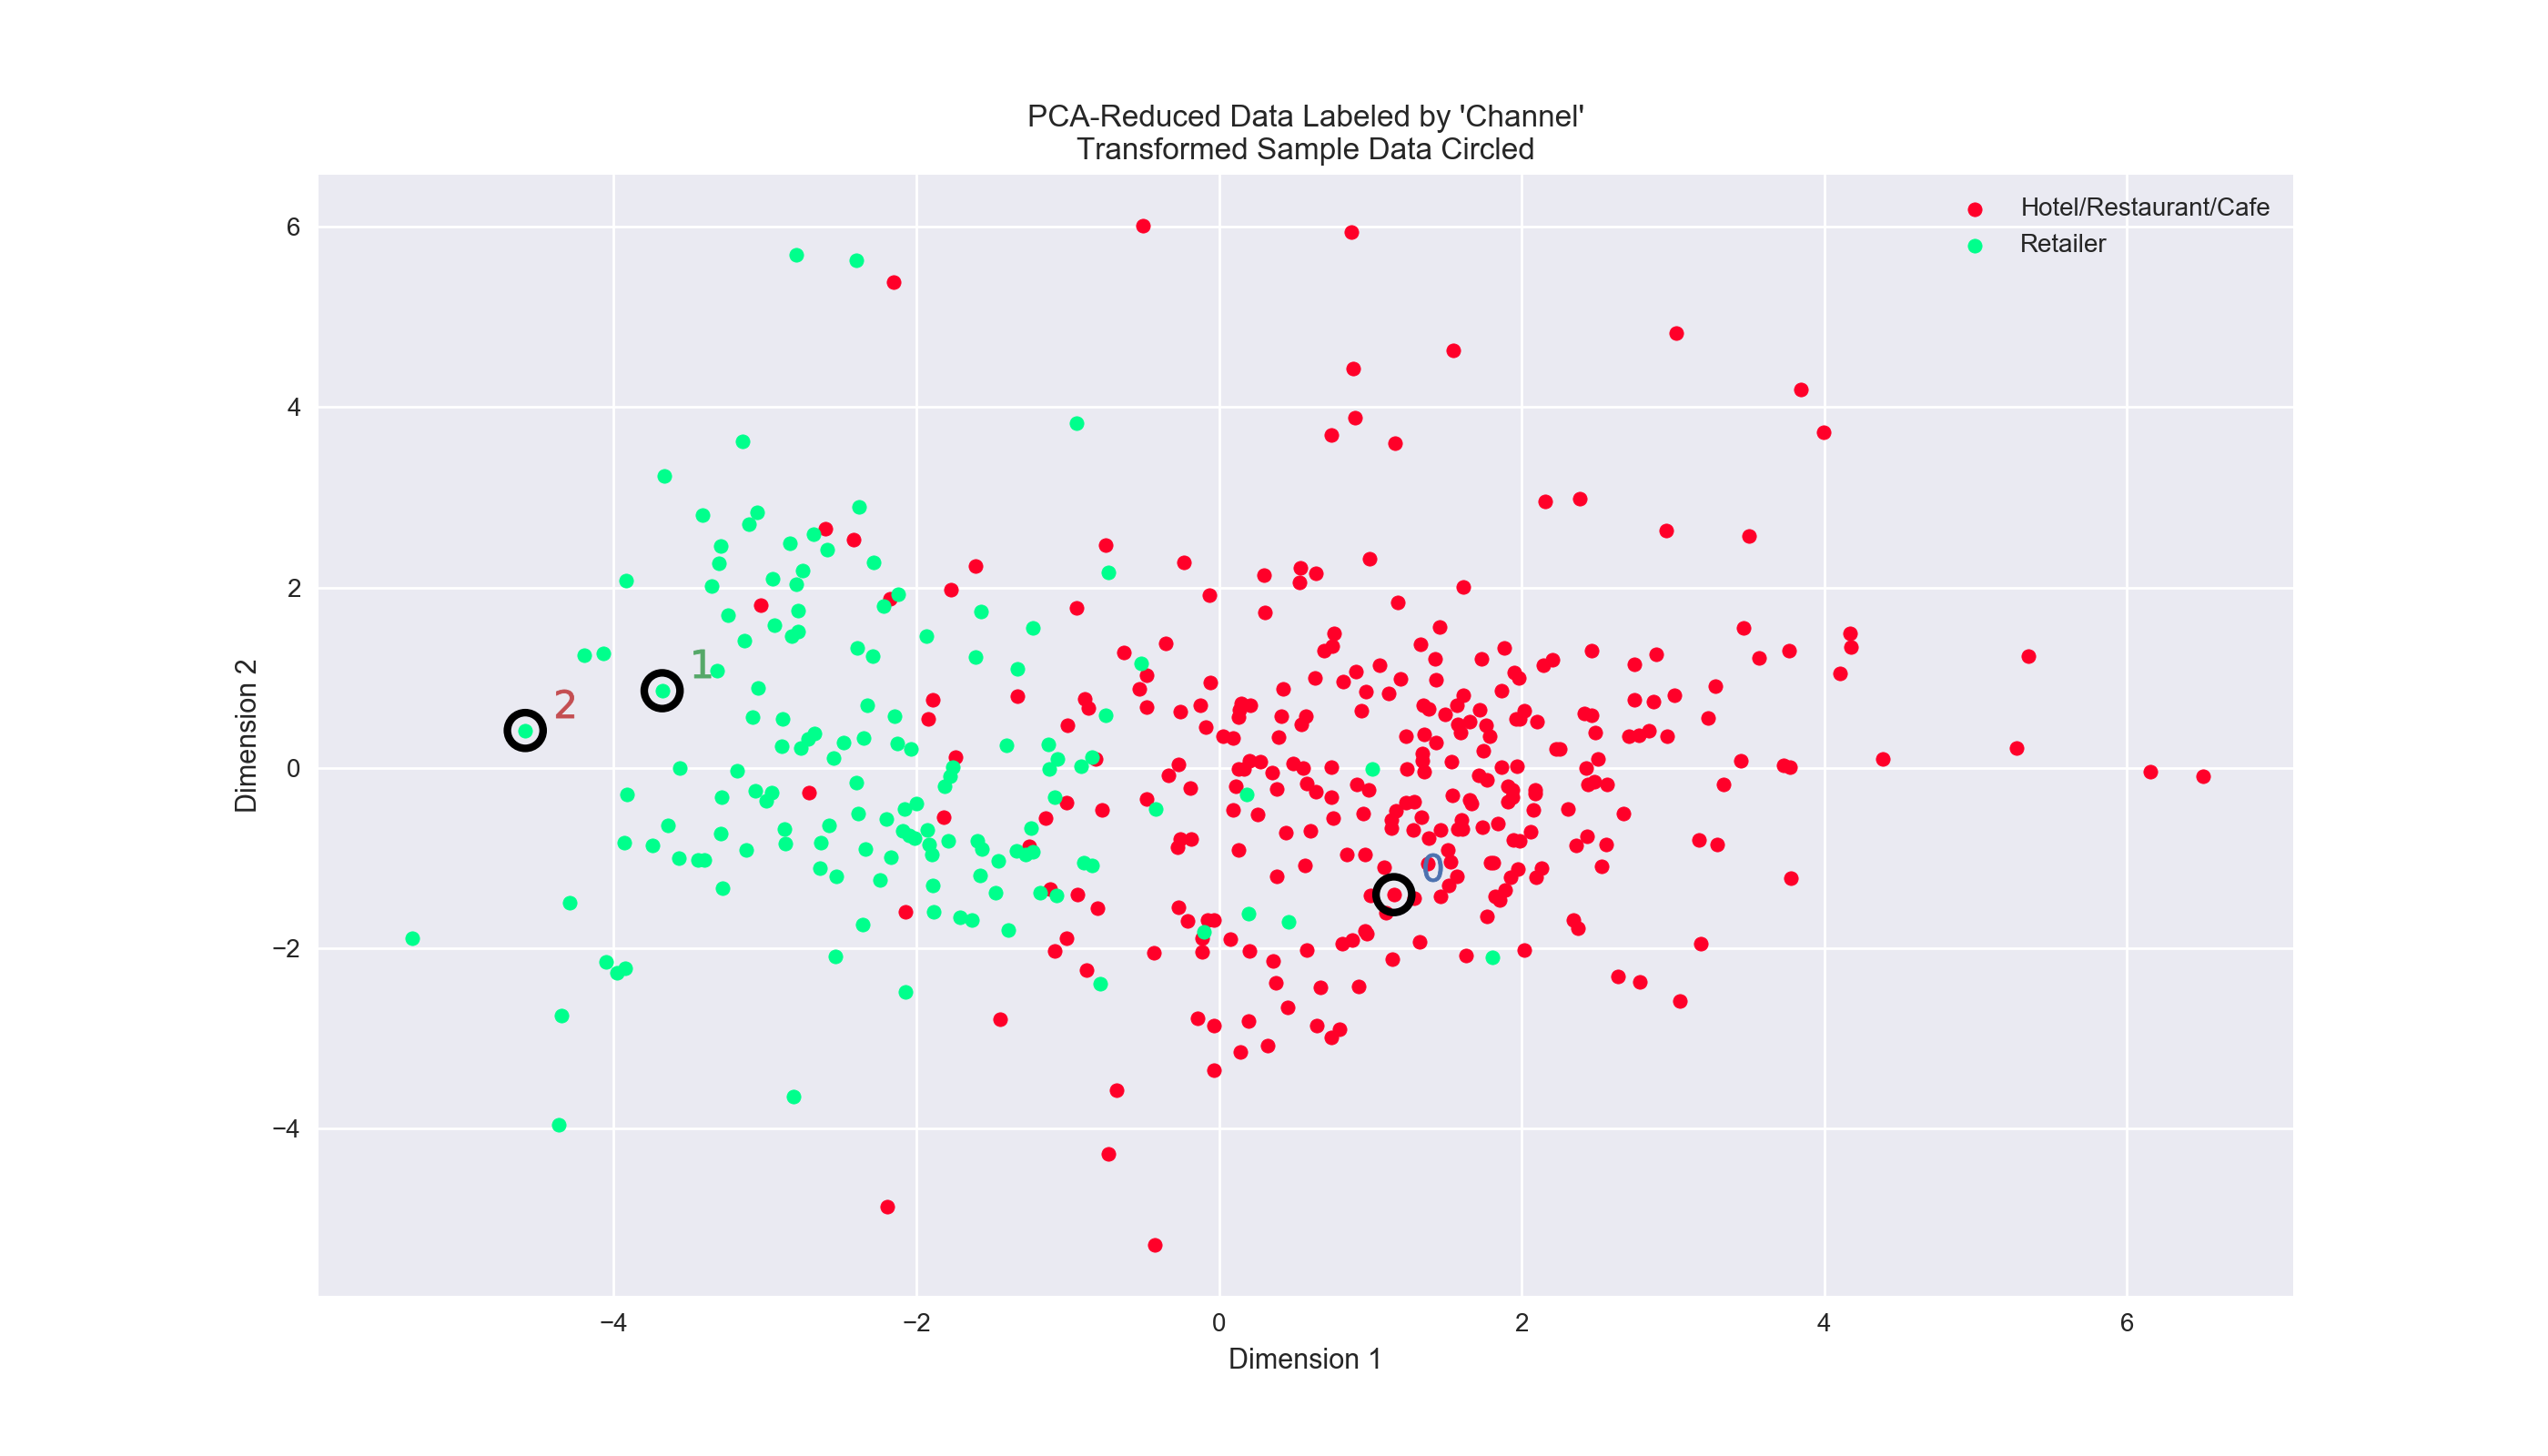

In [116]:
# visulizing underlying distributions
# display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)